<a href="https://colab.research.google.com/github/turjo997/Neural-Network-And-Deep-Learning-/blob/main/Deep%20Learning/Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

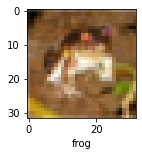

In [11]:
plot_sample(X_train, y_train, 0)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 14s 7ms/step - loss: 1.8165 - accuracy: 0.3514
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6274 - accuracy: 0.4243
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5462 - accuracy: 0.4542
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4866 - accuracy: 0.4746
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4350 - accuracy: 0.4946


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.31      0.44      1000
           1       0.69      0.36      0.47      1000
           2       0.37      0.43      0.40      1000
           3       0.36      0.22      0.28      1000
           4       0.43      0.37      0.40      1000
           5       0.31      0.52      0.39      1000
           6       0.63      0.38      0.47      1000
           7       0.44      0.64      0.52      1000
           8       0.74      0.39      0.51      1000
           9       0.36      0.78      0.49      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.44     10000
weighted avg       0.51      0.44      0.44     10000



In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 6ms/step - loss: 1.5020 - accuracy: 0.4600
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1390 - accuracy: 0.6023
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0078 - accuracy: 0.6498
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9253 - accuracy: 0.6788
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8595 - accuracy: 0.7014
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8045 - accuracy: 0.7175
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7514 - accuracy: 0.7381
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7052 - accuracy: 0.7522
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6696 - accuracy: 0.7672
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9433 - accuracy: 0.6918


[0.943320631980896, 0.6917999982833862]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.3113646e-03, 1.8572318e-04, 3.9553762e-04, 8.8623482e-01,
        3.9301045e-05, 9.3487382e-02, 3.9497917e-03, 4.5379198e-05,
        1.0974715e-02, 3.7596881e-04],
       [2.1757677e-02, 4.7310501e-01, 8.7566252e-05, 4.6701192e-07,
        8.4763919e-08, 1.1099273e-08, 2.8998426e-07, 4.1510685e-07,
        5.0419092e-01, 8.5751282e-04],
       [7.2735436e-02, 6.8112038e-02, 1.4438225e-03, 5.7809404e-04,
        6.9477950e-04, 1.9136607e-05, 1.3100983e-05, 1.8636738e-03,
        8.4898394e-01, 5.5560181e-03],
       [9.0897876e-01, 7.8706751e-03, 5.1233843e-02, 9.8341683e-05,
        2.5657425e-04, 7.1950643e-07, 1.2846338e-04, 2.9255167e-05,
        3.1363264e-02, 4.0114879e-05],
       [3.3753093e-07, 2.8104853e-06, 1.6874244e-02, 1.5301205e-01,
        6.2218660e-01, 2.6392303e-03, 2.0522283e-01, 8.9226960e-06,
        5.2561969e-05, 4.6349510e-07]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

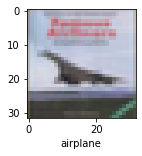

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'